In [1]:
""" Sentiment Analysis using Twitter"""
#Importing libraries for sentiment analysis

import tweepy        #To consume Twitter's API
import pandas as pd  #To handle data
import numpy as np   #For computing number


#For plotting and visualization

from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

""" A script called credentials.py has been created. Check how to create secret and access keys here -https://www.youtube.com/watch?v=T3i2bvDYNmY  """

#Consume
CONSUMER_KEY    = ''
CONSUMER_SECRET = ''

#Access
ACCESS_TOKEN  = ''
ACCESS_SECRET = ''

In [5]:
# We import our access keys:
from credentials import *    # This will allow us to use the keys as variables

# API's setup:
def twitter_setup():
    """
    Utility function to setup the Twitter's API
    with our access keys provided.
    """
    # Authentication and access using keys:
    auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
    auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)

    # Return API with authentication:
    api = tweepy.API(auth)
    return api

In [6]:
# We create an extractor object:
extractor = twitter_setup()

# We create a tweet list as follows:
tweets = extractor.user_timeline(screen_name="realDonaldTrump", count=200)
print("Number of tweets extracted: {}.\n".format(len(tweets)))

# We print the most recent 5 tweets:
print("5 recent tweets:\n")
for tweet in tweets[:5]:
    print(tweet.text)
    print()

Number of tweets extracted: 200.

5 recent tweets:

The Stock Market has been creating tremendous benefits for our country in the form of not only Record Setting Stock… https://t.co/ztq2hDJ7rr

The Fake News Awards, those going to the most corrupt &amp; biased of the Mainstream Media, will be presented to the lo… https://t.co/MFPjW1foo3

Jake Tapper of Fake News CNN just got destroyed in his interview with Stephen Miller of the Trump Administration. W… https://t.co/eIIiydV1hR

I’ve had to put up with the Fake News from the first day I announced that I would be running for President. Now I h… https://t.co/Y5wqMu8WzA

Leaving Camp David for the White House. Great meetings with the Cabinet and Military on many very important subject… https://t.co/HHQLScpuHt



In [7]:
# We create a pandas dataframe as follows:
data = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweets'])

# We display the first 10 elements of the dataframe:
display(data.head(10))

,Tweets
0,The Stock Market has been creating tremendous ...
1,"The Fake News Awards, those going to the most ..."
2,Jake Tapper of Fake News CNN just got destroye...
3,I’ve had to put up with the Fake News from the...
4,Leaving Camp David for the White House. Great ...
5,....to President of the United States (on my f...
6,"....Actually, throughout my life, my two great..."
7,"Now that Russian collusion, after one year of ..."
8,"Brian Ross, the reporter who made a fraudulent..."
9,The African American unemployment rate fell to...


In [8]:
# Internal methods of a single tweet object:
print(dir(tweets[0]))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_api', '_json', 'author', 'contributors', 'coordinates', 'created_at', 'destroy', 'entities', 'favorite', 'favorite_count', 'favorited', 'geo', 'id', 'id_str', 'in_reply_to_screen_name', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'parse', 'parse_list', 'place', 'retweet', 'retweet_count', 'retweeted', 'retweets', 'source', 'source_url', 'text', 'truncated', 'user']


In [9]:
# We print info from the first tweet:
print(tweets[0].id)
print(tweets[0].created_at)
print(tweets[0].source)
print(tweets[0].favorite_count)
print(tweets[0].retweet_count)
print(tweets[0].geo)
print(tweets[0].coordinates)
print(tweets[0].entities)

950105312782114817
2018-01-07 20:42:13
Twitter for iPhone
41364
8756
None
None
{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/ztq2hDJ7rr', 'expanded_url': 'https://twitter.com/i/web/status/950105312782114817', 'display_url': 'twitter.com/i/web/status/9…', 'indices': [117, 140]}]}


In [10]:
# We add relevant data:
data['len']  = np.array([len(tweet.text) for tweet in tweets])
data['ID']   = np.array([tweet.id for tweet in tweets])
data['Date'] = np.array([tweet.created_at for tweet in tweets])
data['Source'] = np.array([tweet.source for tweet in tweets])
data['Likes']  = np.array([tweet.favorite_count for tweet in tweets])
data['RTs']    = np.array([tweet.retweet_count for tweet in tweets])

In [11]:
# Display of first 10 elements from dataframe:
display(data.head(10))

,Tweets,len,ID,Date,Source,Likes,RTs
0,The Stock Market has been creating tremendous ...,140,950105312782114817,2018-01-07 20:42:13,Twitter for iPhone,41364,8756
1,"The Fake News Awards, those going to the most ...",144,950103659337134080,2018-01-07 20:35:39,Twitter for iPhone,66633,17492
2,Jake Tapper of Fake News CNN just got destroye...,140,950023175907266560,2018-01-07 15:15:50,Twitter for iPhone,86900,22045
3,I’ve had to put up with the Fake News from the...,140,950014185299210240,2018-01-07 14:40:06,Twitter for iPhone,110197,23254
4,Leaving Camp David for the White House. Great ...,140,950012437788585985,2018-01-07 14:33:10,Twitter for iPhone,60705,12320
5,....to President of the United States (on my f...,140,949619270631256064,2018-01-06 12:30:51,Twitter for iPhone,132190,32655
6,"....Actually, throughout my life, my two great...",139,949618475877765120,2018-01-06 12:27:42,Twitter for iPhone,124588,34867
7,"Now that Russian collusion, after one year of ...",139,949616329463615489,2018-01-06 12:19:10,Twitter for iPhone,137693,33278
8,"Brian Ross, the reporter who made a fraudulent...",140,949610896241946626,2018-01-06 11:57:35,Twitter for iPhone,110590,22125
9,The African American unemployment rate fell to...,140,949608746497576960,2018-01-06 11:49:02,Twitter for iPhone,133617,30681


In [12]:
# We extract the mean of lenghts:
mean = np.mean(data['len'])

print("The lenght's average in tweets: {}".format(mean))

The lenght's average in tweets: 125.615


In [13]:
# We extract the tweet with more FAVs and more RTs:

fav_max = np.max(data['Likes'])
rt_max  = np.max(data['RTs'])

fav = data[data.Likes == fav_max].index[0]
rt  = data[data.RTs == rt_max].index[0]

# Max FAVs:
print("The tweet with more likes is: \n{}".format(data['Tweets'][fav]))
print("Number of likes: {}".format(fav_max))
print("{} characters.\n".format(data['len'][fav]))

# Max RTs:
print("The tweet with more retweets is: \n{}".format(data['Tweets'][rt]))
print("Number of retweets: {}".format(rt_max))
print("{} characters.\n".format(data['len'][rt]))

The tweet with more likes is: 
North Korean Leader Kim Jong Un just stated that the “Nuclear Button is on his desk at all times.” Will someone fro… https://t.co/EvTgZxiji0
Number of likes: 495575
140 characters.

The tweet with more retweets is: 
North Korean Leader Kim Jong Un just stated that the “Nuclear Button is on his desk at all times.” Will someone fro… https://t.co/EvTgZxiji0
Number of retweets: 193480
140 characters.



In [15]:
# We create time series for data:

tlen = pd.Series(data=data['len'].values, index=data['Date'])
tfav = pd.Series(data=data['Likes'].values, index=data['Date'])
tret = pd.Series(data=data['RTs'].values, index=data['Date'])

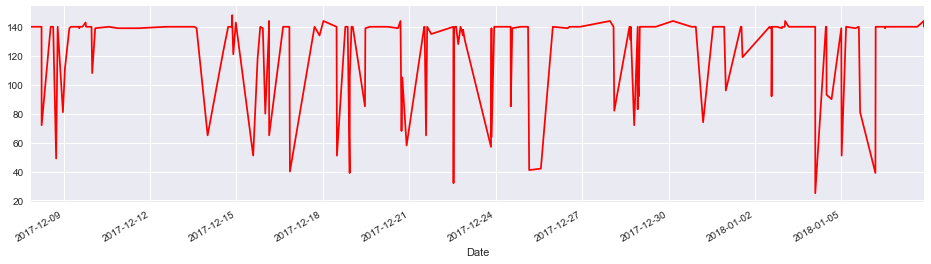

In [16]:
# Lenghts along time:
tlen.plot(figsize=(16,4), color='r');

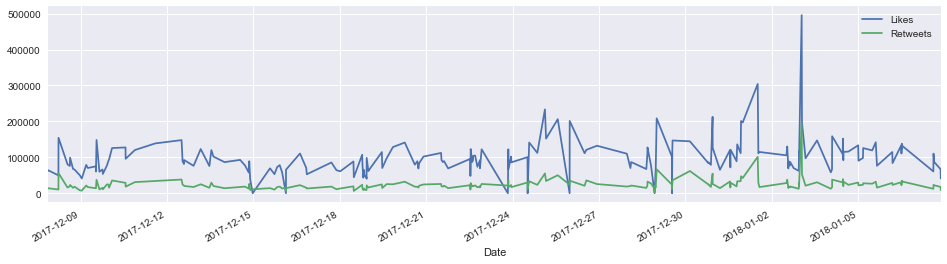

In [17]:
# Likes vs retweets visualization:
tfav.plot(figsize=(16,4), label="Likes", legend=True)
tret.plot(figsize=(16,4), label="Retweets", legend=True);

In [18]:
# We obtain all possible sources:
sources = []
for source in data['Source']:
    if source not in sources:
        sources.append(source)

# We print sources list:
print("Creation of content sources:")
for source in sources:
    print("* {}".format(source))

Creation of content sources:
* Twitter for iPhone
* Twitter Web Client
* Media Studio
* Twitter for iPad


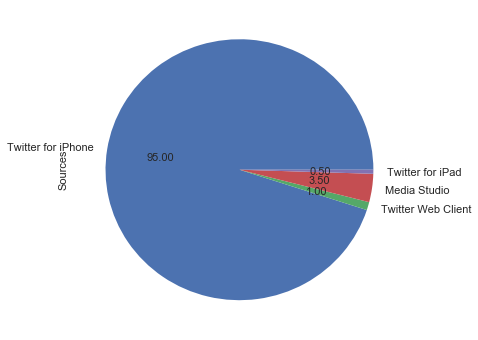

In [19]:
# We create a numpy vector mapped to labels:
percent = np.zeros(len(sources))

for source in data['Source']:
    for index in range(len(sources)):
        if source == sources[index]:
            percent[index] += 1
            pass

percent /= 100

# Pie chart:
pie_chart = pd.Series(percent, index=sources, name='Sources')
pie_chart.plot.pie(fontsize=11, autopct='%.2f', figsize=(6, 6));

In [27]:
from textblob import TextBlob
import re

def clean_tweet(tweet):
    '''
    Utility function to clean the text in a tweet by removing 
    links and special characters using regex.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

def analize_sentiment(tweet):
    '''
    Utility function to classify the polarity of a tweet
    using textblob.
    '''
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

In [28]:
# We create a column with the result of the analysis:
data['SA'] = np.array([ analize_sentiment(tweet) for tweet in data['Tweets'] ])

# We display the updated dataframe with the new column:
display(data.head(10))

,Tweets,len,ID,Date,Source,Likes,RTs,SA
0,The Stock Market has been creating tremendous ...,140,950105312782114817,2018-01-07 20:42:13,Twitter for iPhone,41364,8756,1
1,"The Fake News Awards, those going to the most ...",144,950103659337134080,2018-01-07 20:35:39,Twitter for iPhone,66633,17492,-1
2,Jake Tapper of Fake News CNN just got destroye...,140,950023175907266560,2018-01-07 15:15:50,Twitter for iPhone,86900,22045,-1
3,I’ve had to put up with the Fake News from the...,140,950014185299210240,2018-01-07 14:40:06,Twitter for iPhone,110197,23254,-1
4,Leaving Camp David for the White House. Great ...,140,950012437788585985,2018-01-07 14:33:10,Twitter for iPhone,60705,12320,1
5,....to President of the United States (on my f...,140,949619270631256064,2018-01-06 12:30:51,Twitter for iPhone,132190,32655,1
6,"....Actually, throughout my life, my two great...",139,949618475877765120,2018-01-06 12:27:42,Twitter for iPhone,124588,34867,1
7,"Now that Russian collusion, after one year of ...",139,949616329463615489,2018-01-06 12:19:10,Twitter for iPhone,137693,33278,1
8,"Brian Ross, the reporter who made a fraudulent...",140,949610896241946626,2018-01-06 11:57:35,Twitter for iPhone,110590,22125,-1
9,The African American unemployment rate fell to...,140,949608746497576960,2018-01-06 11:49:02,Twitter for iPhone,133617,30681,1


In [29]:
# We construct lists with classified tweets:

pos_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] > 0]
neu_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] == 0]
neg_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] < 0]

In [30]:
# We print percentages:

print("Percentage of positive tweets: {}%".format(len(pos_tweets)*100/len(data['Tweets'])))
print("Percentage of neutral tweets: {}%".format(len(neu_tweets)*100/len(data['Tweets'])))
print("Percentage de negative tweets: {}%".format(len(neg_tweets)*100/len(data['Tweets'])))

Percentage of positive tweets: 56.0%
Percentage of neutral tweets: 20.5%
Percentage de negative tweets: 23.5%
